<a href="https://colab.research.google.com/github/Pablo7776/An-lisis_de_Datos_de_Ventas_Mensuales/blob/main/Clasificador_de_canciones_de_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio
## Clasificador de canciones de Spotify

#Alumnos:
##Pablo Duran
##Ezequiel Flores
##Tomás Pereyra


In [8]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split  # Para dividir el conjunto de datos en entrenamiento y prueba
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Para evaluar el modelo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

importamos el archivo .csv

In [9]:
# Si el archivo está en Google Drive
#archivo_csv = 'Canciones_Spotify.csv'

# Importa el archivo CSV en un DataFrame de Pandas
#data = pd.read_csv(archivo_csv)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Ruta al archivo CSV en Google Drive (asegúrate de que la ruta sea correcta)
archivo_csv = '/content/drive/MyDrive/Colab Notebooks/Canciones_Spotify.csv'

# Importa el archivo CSV en un DataFrame de Pandas
data = pd.read_csv(archivo_csv)

In [12]:
# Cuenta cuántos 0s y cuántos 1s hay en la columna "target"
conteo_target = data['target'].value_counts()

# Imprime el resultado
print(conteo_target)

1    1020
0     997
Name: target, dtype: int64


********************************************************************************************************************************************************************************************************************************************************************************************
Modelo de clasificación supervisada:

KNN

********************************************************************************************************************************************************************************************************************************************************************************************

In [13]:
# Dividir los datos en características (X) y etiquetas (y)
xK = data[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',  'valence']]
yK = data['target']

In [14]:

# Dividir los datos en conjuntos de entrenamiento y prueba

#con stratify=yK realizamos un muestreo estratificado al dividir tus datos en conjuntos de entrenamiento y prueba. El muestreo estratificado asegura que las proporciones de las clases se mantengan en ambos conjuntos.
X_train, X_test, y_train, y_test = train_test_split(xK, yK, test_size=0.2,stratify=yK, random_state=42)

# Normalizar las características (esto es importante para KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lista para almacenar las precisiones
accuracies = []




experimentamos con distintos valores de hiperpárametros

In [15]:
# Rango de valores de "n_neighbors" que deseas probar
n_neighbors_values = range(1, 30)  # Puedes ajustar el rango según tus necesidades


# Valores de "weights" que deseas probar
weights_values = ['uniform', 'distance']  # Puedes ajustar los valores según tus necesidades

for n_neighbors in n_neighbors_values:
    for weights in weights_values:
        # Crear el modelo KNN con los valores actuales de "n_neighbors" y "weights"
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)

        # Entrenar el modelo
        knn.fit(X_train, y_train)

        # Realizar predicciones en el conjunto de prueba
        y_predK = knn.predict(X_test)

        # Calcular la precisión del modelo y almacenarla en la lista
        accuracy = accuracy_score(y_test, y_predK)
        accuracies.append((n_neighbors, weights, accuracy))

# Imprimir los resultados de la precisión para diferentes combinaciones de hiperparámetros
for n_neighbors, weights, accuracy in accuracies:
    print("Precisión del modelo KNN con {} vecinos y weights='{}': {:.2f}%".format(n_neighbors, weights, accuracy * 100))

Precisión del modelo KNN con 1 vecinos y weights='uniform': 64.85%
Precisión del modelo KNN con 1 vecinos y weights='distance': 64.85%
Precisión del modelo KNN con 2 vecinos y weights='uniform': 63.37%
Precisión del modelo KNN con 2 vecinos y weights='distance': 64.85%
Precisión del modelo KNN con 3 vecinos y weights='uniform': 70.54%
Precisión del modelo KNN con 3 vecinos y weights='distance': 71.04%
Precisión del modelo KNN con 4 vecinos y weights='uniform': 67.33%
Precisión del modelo KNN con 4 vecinos y weights='distance': 70.54%
Precisión del modelo KNN con 5 vecinos y weights='uniform': 71.29%
Precisión del modelo KNN con 5 vecinos y weights='distance': 70.79%
Precisión del modelo KNN con 6 vecinos y weights='uniform': 66.09%
Precisión del modelo KNN con 6 vecinos y weights='distance': 70.30%
Precisión del modelo KNN con 7 vecinos y weights='uniform': 71.78%
Precisión del modelo KNN con 7 vecinos y weights='distance': 72.03%
Precisión del modelo KNN con 8 vecinos y weights='unifo

nos quedamos solo con los mejores hipepárametros

In [16]:

# Encontrar la combinación de hiperparámetros con la mayor precisión
best_accuracy = -1  # Inicializa la mejor precisión con un valor negativo
best_n_neighbors = None
best_weights = None

for n_neighbors, weights, accuracy in accuracies:
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_neighbors = n_neighbors
        best_weights = weights

# Imprimir la combinación de hiperparámetros con la mejor precisión
print("Mejor combinación de hiperparámetros:")
print("Número de vecinos (n_neighbors):", best_n_neighbors)
print("Peso de los vecinos (weights):", best_weights)
print("Precisión del modelo KNN con la mejor combinación de hiperparámetros: {:.2f}%".format(best_accuracy * 100))

# Crear y ajustar el modelo KNN final con la mejor combinación de hiperparámetros
final_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights=best_weights)
final_knn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_final = final_knn.predict(X_test)

# Calcular la precisión del modelo final
final_accuracy = accuracy_score(y_test, y_pred_final)
print("Precisión del modelo KNN final: {:.2f}%".format(final_accuracy * 100))

Mejor combinación de hiperparámetros:
Número de vecinos (n_neighbors): 20
Peso de los vecinos (weights): distance
Precisión del modelo KNN con la mejor combinación de hiperparámetros: 74.50%
Precisión del modelo KNN final: 74.50%


Evaluación y análisis del rendimiento:

In [17]:
matriz_confusion = confusion_matrix(y_test, y_predK)

print("Matriz de confusión")
print(matriz_confusion)


Matriz de confusión
[[165  35]
 [ 71 133]]


In [18]:
print("Reporte de clasificación:\n", classification_report(y_test, y_predK))

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.70      0.82      0.76       200
           1       0.79      0.65      0.72       204

    accuracy                           0.74       404
   macro avg       0.75      0.74      0.74       404
weighted avg       0.75      0.74      0.74       404



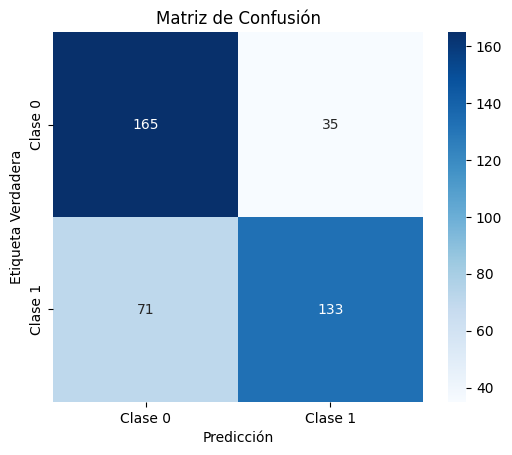

In [19]:
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', square=True, xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

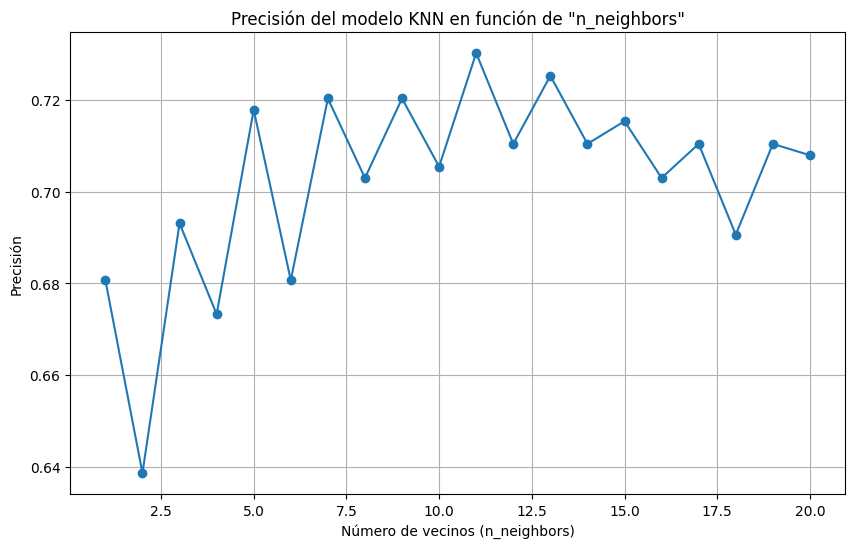

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(xK, yK, test_size=0.2, random_state=42)

# Normalizar las características (esto es importante para KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lista para almacenar las precisiones
accuracies = []

# Rango de valores de "n_neighbors" que deseas probar
n_neighbors_values = range(1, 21)  # Puedes ajustar el rango según tus necesidades

for n_neighbors in n_neighbors_values:
    # Crear el modelo KNN con el valor actual de "n_neighbors"
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Entrenar el modelo
    knn.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = knn.predict(X_test)

    # Calcular la precisión del modelo y almacenarla en la lista
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Graficar la precisión en función de "n_neighbors"
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, accuracies, marker='o')
plt.title('Precisión del modelo KNN en función de "n_neighbors"')
plt.xlabel('Número de vecinos (n_neighbors)')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()

********************************************************************************************************************************************************************************************************************************************************************************************
Modelo de clasificación supervisada:

SVM

********************************************************************************************************************************************************************************************************************************************************************************************

In [23]:

# Cargar el conjunto de datos desde un archivo CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Canciones_Spotify.csv')




# Definir la lista de combinaciones de características que deseas probar
combinations = [

    #Dejamos comentadas algunas las listas para no consumir demasiado tiempo, Dejamos solo las que tuvieron mejor desempeño

    ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence'],
    #[ 'danceability', 'instrumentalness', 'loudness'],
    #[ 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness', 'valence']

    # Agrega más combinaciones de características aquí
]





for feature_set in combinations:
    # Seleccionar las características (columnas) y la etiqueta (target) para la combinación actual
    X = df[feature_set]
    y = df['target']

    # Dividir el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Normalizar las características
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Crear el modelo SVM
    svm_model = SVC()

    #IMPORTANTE: SOLO USAR SI SE DESEA APLICAR EL TIPO DE VOTACIÓN "2", TENER EN CUENTA DE QUE LLEVA MUCHO MÁS TIEMPO
    #svm_model = SVC(probability=True)

    # Definir la cuadrícula de hiperparámetros a buscar
    param_grid = {
        'C': [ 1, 2.9, 3 , 3.1,3.2,3.3,3.4,4, 5 ],  # Valores de regularización

        # Dejamos comentada la lista con distintos tipos de kernels para no consumir demasiado tiempo
        #'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Tipos de kernel
        'kernel': [ 'rbf'],
        'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1, 5,  10, 100],  # Valores para el hiperparámetro gamma
    }

    # Realizar la búsqueda de hiperparámetros utilizando validación cruzada
    grid_search = GridSearchCV(svm_model, param_grid, cv=10)
    grid_search.fit(X_train, y_train)

    # Obtener el modelo con los mejores hiperparámetros
    best_svm_model = grid_search.best_estimator_

    # Realizar predicciones en los datos de prueba
    y_pred_SVM = best_svm_model.predict(X_test)

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred_SVM)

    # Calcular la matriz de confusión
    confusion = confusion_matrix(y_test, y_pred_SVM)

    # Imprimir los resultados
    print("Mejores grupos de características:", feature_set)
    print("Mejores hiperparámetros:", grid_search.best_params_)
    print("Precisión:", accuracy)
    print("Matriz de confusión:\n", confusion)
    print("Reporte de clasificación:\n", classification_report(y_test, y_pred_SVM))

Mejores grupos de características: ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']
Mejores hiperparámetros: {'C': 3.1, 'gamma': 'auto', 'kernel': 'rbf'}
Precisión: 0.7722772277227723
Matriz de confusión:
 [[158  42]
 [ 50 154]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.76      0.79      0.77       200
           1       0.79      0.75      0.77       204

    accuracy                           0.77       404
   macro avg       0.77      0.77      0.77       404
weighted avg       0.77      0.77      0.77       404



In [24]:
matriz_confusion = confusion_matrix(y_test, y_pred_SVM)

print("Matriz de confusión")
print(matriz_confusion)

Matriz de confusión
[[158  42]
 [ 50 154]]


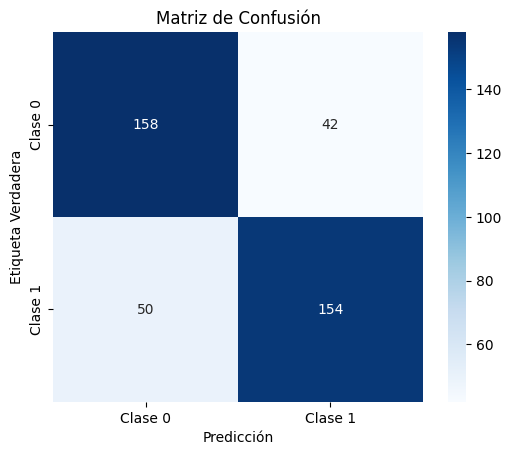

In [25]:
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', square=True, xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

********************************************************************************************************************************************************************************************************************************************************************************************
Modelo de clasificación supervisada:

ARBOL DE DECISIÓN

********************************************************************************************************************************************************************************************************************************************************************************************

In [26]:
from sklearn.preprocessing import StandardScaler
# Estandarizar los datos
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros que deseas explorar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5, 6, 7]  # Ajustar los valores según tus necesidades
}

# Crear el modelo de Árbol de Decisión
arbol = DecisionTreeClassifier(random_state=1)

# Crear un objeto GridSearchCV para buscar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(estimator=arbol, param_grid=param_grid, scoring='accuracy', cv=5)

# Ajustar el modelo de búsqueda de hiperparámetros en los datos de entrenamiento
grid_search.fit(X_train_std, y_train)

# Obtener la mejor combinación de hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones con el mejor modelo
decision_tree_predictions = best_model.predict(X_test)

# Calcular la precisión del mejor modelo
accuracy = accuracy_score(y_test, decision_tree_predictions)
print("Mejor precisión del modelo de Árbol de Decisión: {:.2f}%".format(accuracy * 100))
print(best_params)
print(best_model)


Mejor precisión del modelo de Árbol de Decisión: 68.81%
{'criterion': 'entropy', 'max_depth': 6}
DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1)


Evaluación y análisis del rendimiento:

In [28]:
accuracy = accuracy_score(y_test, decision_tree_predictions)
print("Precisión:", accuracy)

Precisión: 0.6881188118811881


In [29]:
matriz_confusion = confusion_matrix(y_test, decision_tree_predictions)

print("Matriz de confusión")
print(matriz_confusion)

Matriz de confusión
[[149  51]
 [ 75 129]]


In [30]:
print("Reporte de clasificación:\n", classification_report(y_test, decision_tree_predictions))

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.67      0.74      0.70       200
           1       0.72      0.63      0.67       204

    accuracy                           0.69       404
   macro avg       0.69      0.69      0.69       404
weighted avg       0.69      0.69      0.69       404



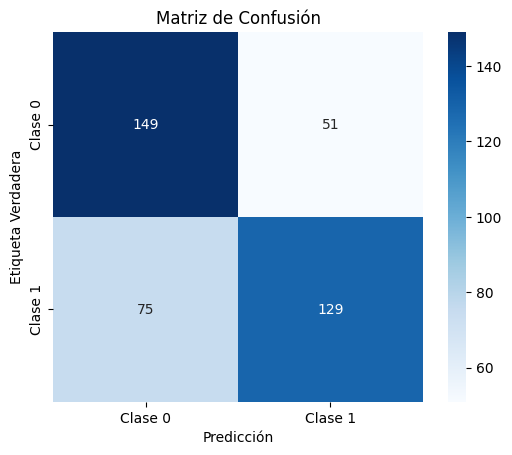

In [31]:
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', square=True, xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

********************************************************************************************************************************************************************************************************************************************************************************************
Modelo de clasificación supervisada:

BAYES

********************************************************************************************************************************************************************************************************************************************************************************************

Se deja comentado el siguiente código debido a sus pobres resultados

In [32]:
# # Dividir los datos en características (X) y etiquetas (y)
# xB = data[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',  'valence']]
# yB = data['target']

In [33]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.naive_bayes import GaussianNB

# # Dividir los datos en conjuntos de entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(xB, yB, test_size=0.2, random_state=42)

# # Inicializar el clasificador Naive Bayes (GaussianNB)
# naive_bayes_classifier = GaussianNB()

# # Definir los hiperparámetros que deseas ajustar
# param_grid = {
#     'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Ejemplo de valores para var_smoothing
# }

# # Inicializar la búsqueda de cuadrícula
# grid_search = GridSearchCV(estimator=naive_bayes_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# # Realizar la búsqueda de cuadrícula en los datos de entrenamiento
# grid_search.fit(X_train, y_train)

# # Obtener los mejores hiperparámetros
# best_params = grid_search.best_params_
# print("Mejores hiperparámetros:", best_params)

# # Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
# best_naive_bayes_classifier = grid_search.best_estimator_
# y_predB = best_naive_bayes_classifier.predict(X_test)

# # Calcular la precisión del modelo con los mejores hiperparámetros
# accuracy = accuracy_score(y_test, y_pred)
# print("Precisión del modelo con los mejores hiperparámetros:", accuracy)

********************************************************************************************************************************************************************************************************************************************************************************************
VOTACIÓN TIPO 1

Implementamos un tipo de votación simple llamado "votación mayoritaria" o "votación por mayoría" en el contexto de la clasificación.

********************************************************************************************************************************************************************************************************************************************************************************************

In [34]:
import seaborn as sns

In [35]:
final_predictions = []
for k, s , t in zip(y_predK, y_pred_SVM, decision_tree_predictions):


    votes = {0: 0, 1: 0}
    votes[k] += 1
    votes[s] += 1
    votes[t] += 1

    #votes[s] vota doble por ser el mejor modelo



    majority_vote = max(votes, key=votes.get)
    final_predictions.append(majority_vote)



In [36]:
accuracyFINAL = accuracy_score(y_test, final_predictions)
print("Precisión los modelos: {:.2f}%".format(accuracyFINAL * 100))

Precisión los modelos: 77.97%


In [37]:
matriz_confusion = confusion_matrix(y_test, final_predictions)

print("Matriz de confusión")
print(matriz_confusion)

Matriz de confusión
[[166  34]
 [ 55 149]]


In [38]:
print("Reporte de clasificación:\n", classification_report(y_test, final_predictions))

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.75      0.83      0.79       200
           1       0.81      0.73      0.77       204

    accuracy                           0.78       404
   macro avg       0.78      0.78      0.78       404
weighted avg       0.78      0.78      0.78       404



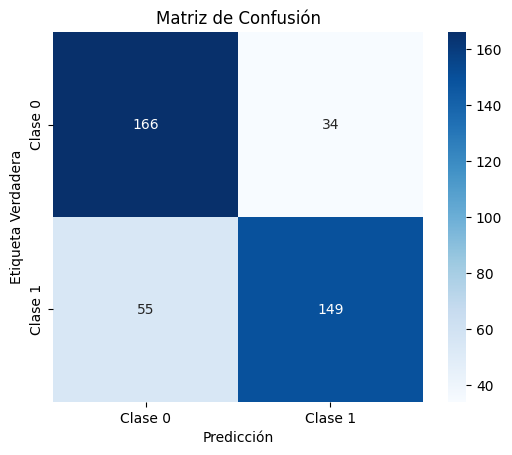

In [39]:
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', square=True, xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()


********************************************************************************************************************************************************************************************************************************************************************************************
VOTACIÓN TIPO 2

 En este caso, se utiliza el enfoque de "votación suave", lo que significa que se ponderan las predicciones de cada modelo en función de su confianza

 IMPORTANTE: para utilizarla descomentar la linea "svm_model = SVC(probability=True)" y tener en cuenta que lleva más tiempo

 Optamos por dejar comentada esta parte del código ya que sus resultados no son tan óptimos como la "votación tipo 1"

 ******************************************************************************************************************************************************************************************************************************************************************************************

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:

# # Crea el clasificador de votación
# voting_classifier = VotingClassifier(estimators=[
#     ('model1', knn),
#     ('model2', best_svm_model),
#     ('model3', arbol)
# ], voting='soft')

# # Definir los conjuntos de datos de entrenamiento y validación
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Resto del código

# # Entrena el clasificador de votación
# voting_classifier.fit(X_train, y_train)

# # Realiza predicciones en el conjunto de validación
# y_pred = voting_classifier.predict(X_val)
# final_accuracy = accuracy_score(y_val, y_pred)
# num_estimators = len(voting_classifier.estimators_)
# print(f"Número de modelos que votaron: {num_estimators}")

# print("Precisión del modelo de votación ponderada:", final_accuracy)